<a href="https://colab.research.google.com/github/kvsharma13/netflix-data-analytics/blob/main/netflix_data_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install necessary libraries
!pip install pandas matplotlib seaborn


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set style
sns.set(style='darkgrid')


In [4]:
from google.colab import files
uploaded = files.upload()


Saving netflix_titles.csv to netflix_titles.csv


In [5]:
# Load the dataset
df = pd.read_csv('netflix_titles.csv')

# Display first few rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
# Basic info
df.info()

# Check missing values
df.isnull().sum()

# Fill or drop missing values
df['country'].fillna('Unknown', inplace=True)
df.dropna(subset=['date_added'], inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


<ipython-input-6-e0d49d72decc>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)


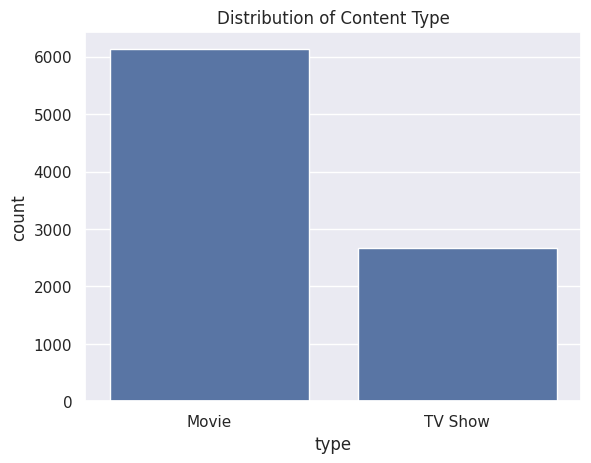

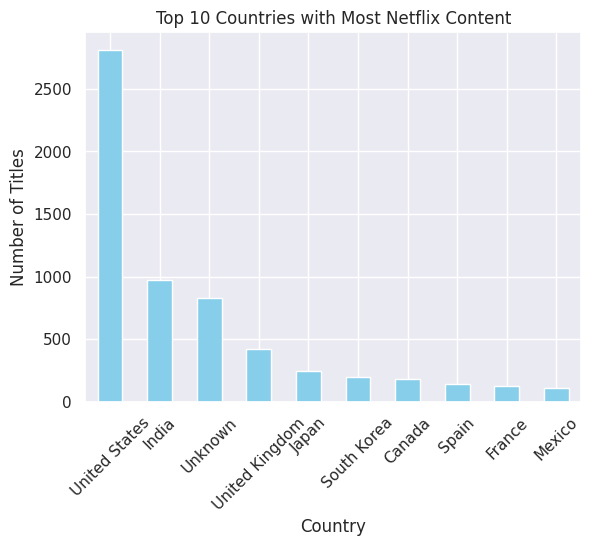

In [7]:
# Count of types (Movie or TV Show)
sns.countplot(data=df, x='type')
plt.title('Distribution of Content Type')
plt.show()

# Top 10 countries with most content
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with Most Netflix Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


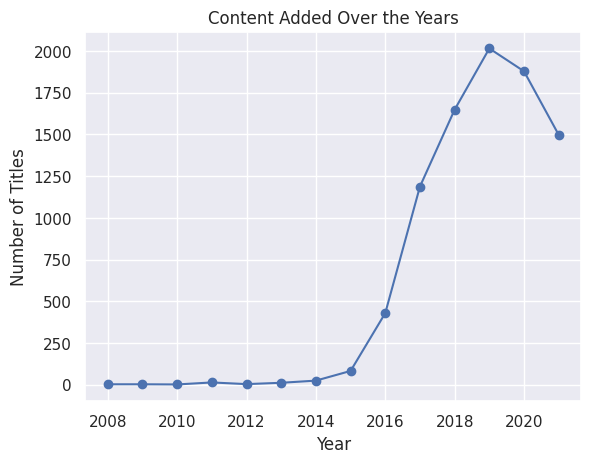

In [17]:
# Convert everything to string first, then strip whitespace
df['date_added'] = df['date_added'].astype(str).str.strip()

# Replace 'nan' strings with actual NaN values
df['date_added'] = df['date_added'].replace('nan', pd.NA)

# Convert to datetime safely
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Drop rows where date is missing (optional but recommended)
df = df.dropna(subset=['date_added'])

# Extract year
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Content Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


<ipython-input-18-aadc4bc2b108>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres, x='Count', y='Genre', palette='viridis')


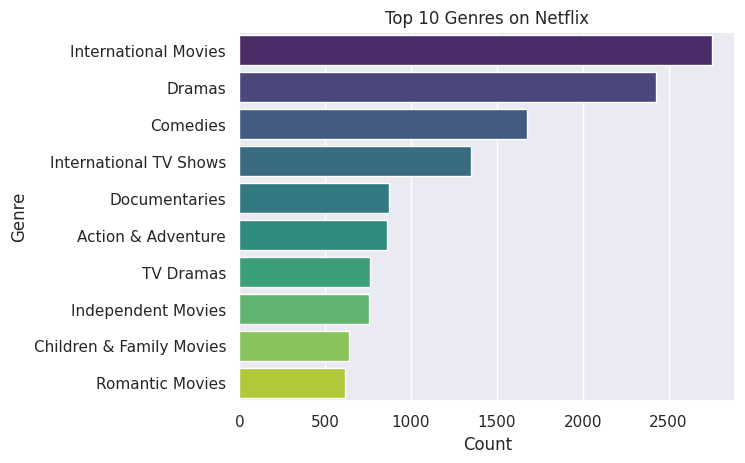

In [18]:
# Split genres and count
from collections import Counter

genres = df['listed_in'].str.split(', ')
all_genres = sum(genres, [])
genre_counts = Counter(all_genres)

# Top 10
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])
sns.barplot(data=top_genres, x='Count', y='Genre', palette='viridis')
plt.title('Top 10 Genres on Netflix')
plt.show()

In [19]:
# Display key insights
print("✅ Most content on Netflix is movies.")
print("✅ United States has the most Netflix titles.")
print("✅ The number of added titles increased sharply after 2015.")
print("✅ Documentaries and Dramas are among the most common genres.")

✅ Most content on Netflix is movies.
✅ United States has the most Netflix titles.
✅ The number of added titles increased sharply after 2015.
✅ Documentaries and Dramas are among the most common genres.
